In [16]:
import requests
from bs4 import BeautifulSoup

In [17]:
url = "https://mayankjaiswal27.github.io/python-project/"

In [18]:
response = requests.get(url)
print(response)

<Response [200]>


In [19]:
soup = BeautifulSoup(response.text, 'html.parser')

In [20]:
soup


<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<title>Nagpur Land Price</title>
<style>
      body,
      html {
        height: 100%;
        margin: 0;
        padding: 0;
        font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
        background: linear-gradient(to right, #a813b0, #cf88c0);
        color: #000000;
        overflow: auto;
      }
      

      #container,h1 {
        display: flex;
        flex-direction: column;
        align-items: center;
        justify-content: center;
        height: 30vh;
        animation: fadeIn 2s ease-in-out;
      }

      h1 {
        font-size: 3em;
        margin-bottom: 20px;
      }

      #text {
    max-width: 800px;
    margin: 0 auto; /* Center align horizontally */
    padding: 20px;
    border: 1px solid #ccc;
    border-radius: 10px;
    background-color: rgba(255, 255, 255, 0.9);
    box-shadow: 0 0 20px rgba(0, 0, 0, 0.2)

In [21]:
import csv

In [22]:
table = soup.find('table')
rows = table.find_all('tr')

csv_file_name = 'extracted_data.csv'
with open(csv_file_name, 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)

    header = [th.text.strip() for th in rows[0].find_all('th')]
    writer.writerow(header)

    for row in rows[1:]:
        data = [td.text.strip() for td in row.find_all('td')]
        writer.writerow(data)

print('Data has been written to',csv_file_name)

Data has been written to extracted_data.csv


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv('extracted_data.csv')

#### Bar chart of the average area for each type of land

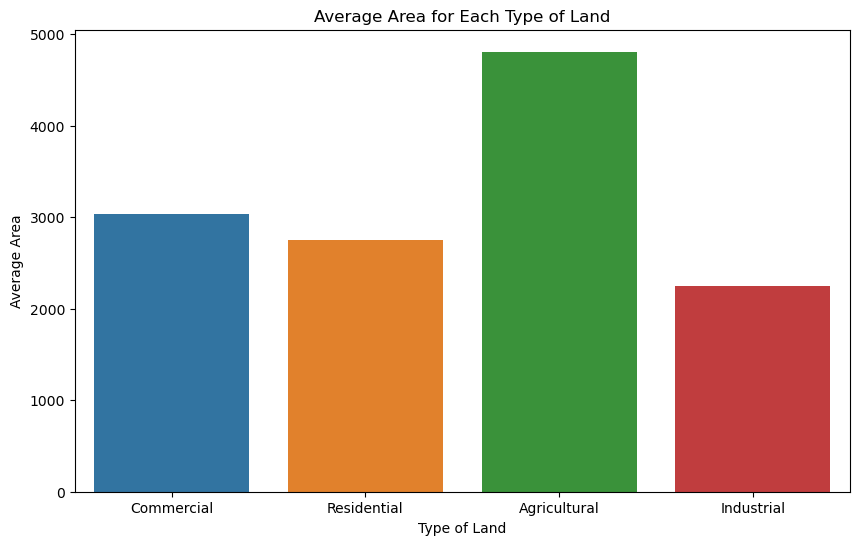

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Type of Land', y='Area', data=df, errorbar=None)
plt.title('Average Area for Each Type of Land')
plt.xlabel('Type of Land')
plt.ylabel('Average Area')
plt.show()

#### Court for each type of land

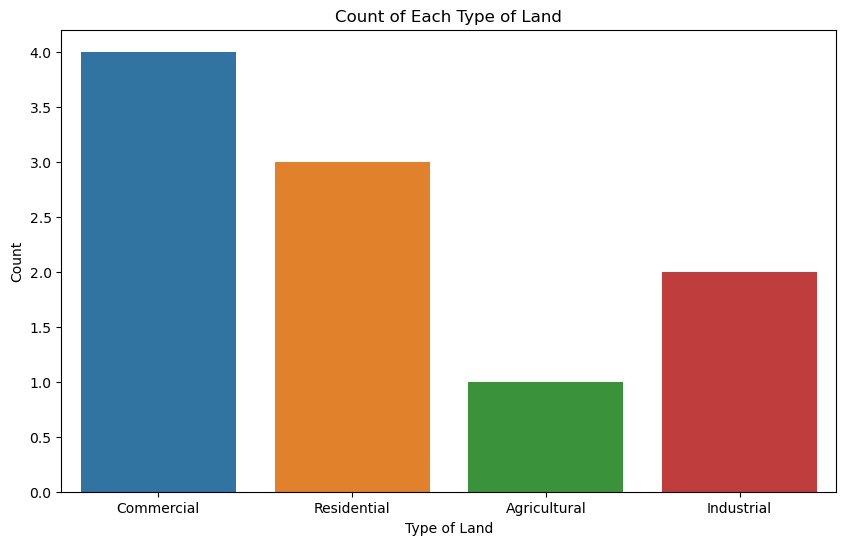

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Type of Land', data=df)
plt.title('Count of Each Type of Land')
plt.xlabel('Type of Land')
plt.ylabel('Count')
plt.show()

#### Scatter plot between distance of city and crime rate

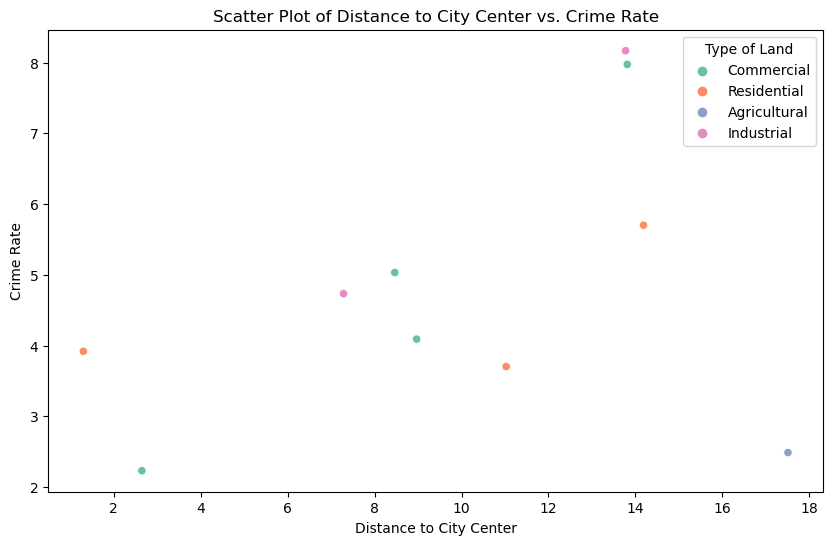

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance to City Center', y='Crime Rate', data=df, hue='Type of Land', palette='Set2')
plt.title('Scatter Plot of Distance to City Center vs. Crime Rate')
plt.xlabel('Distance to City Center')
plt.ylabel('Crime Rate')
plt.legend(title='Type of Land')
plt.show()

#### Correlation heatmap

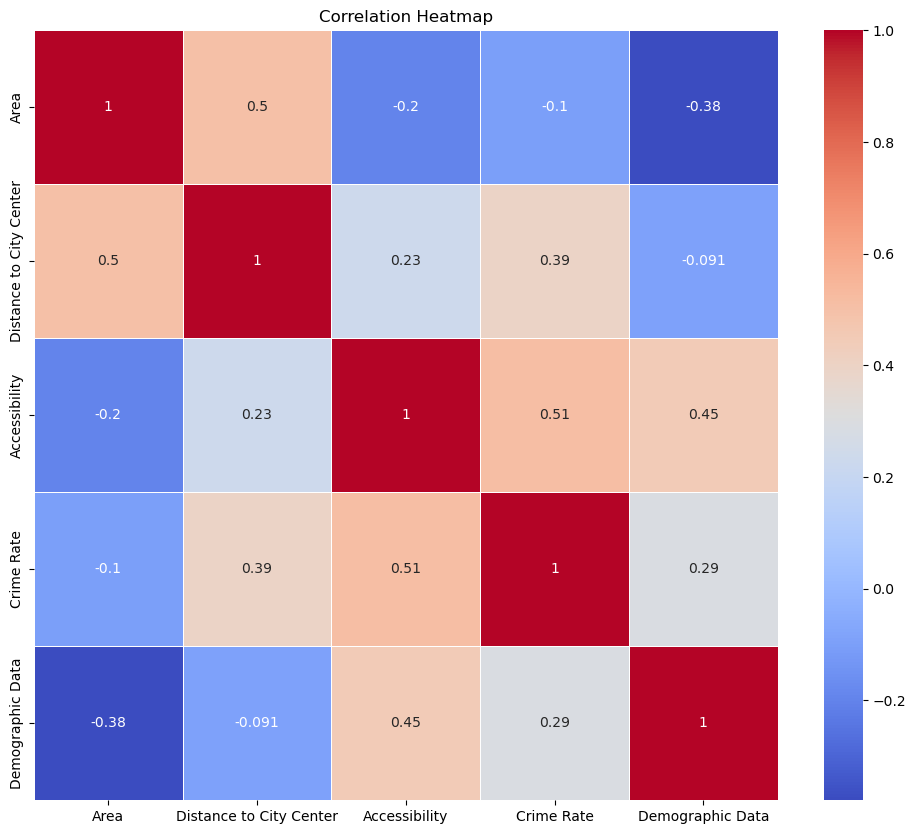

In [29]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(12, 10))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

#### Pairplot on some selected columns

/Users/apple/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


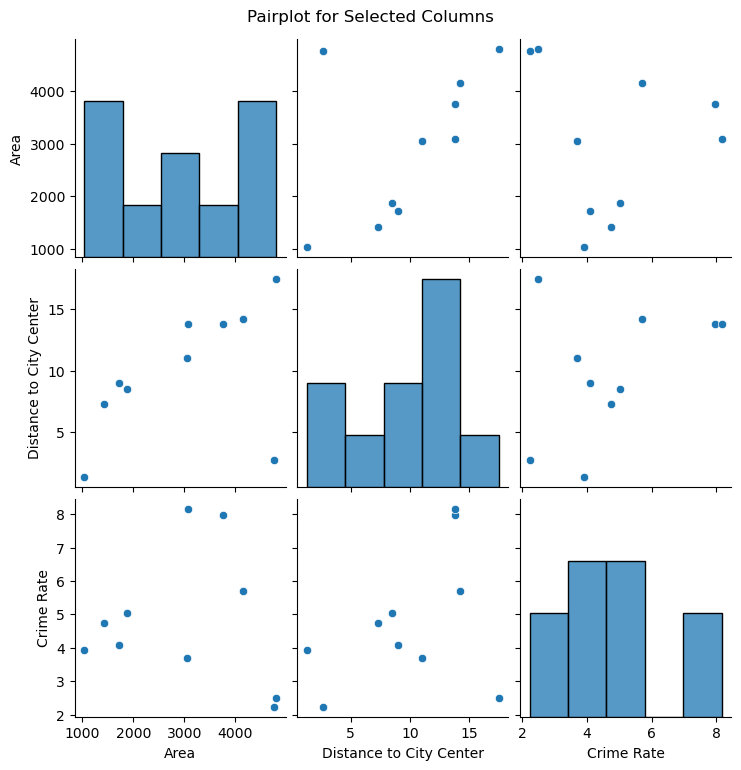

In [30]:
selected_columns = ['Area', 'Distance to City Center', 'Crime Rate', 'Market Trends']
sns.pairplot(df[selected_columns])
plt.suptitle('Pairplot for Selected Columns', y=1.02)
plt.show()

#### Pie chart showing crime rate distribution

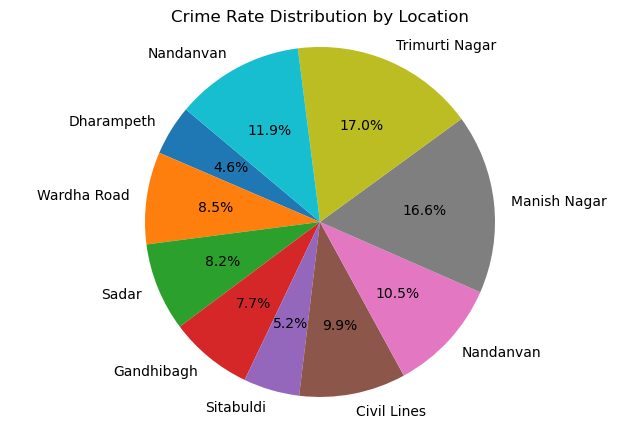

In [33]:
crime_rate_labels = df['Location']
crime_rate_values = df['Crime Rate']

plt.figure(figsize=(8, 5))
plt.pie(crime_rate_values, labels=crime_rate_labels, autopct='%1.1f%%', startangle=140)
plt.title('Crime Rate Distribution by Location')
plt.axis('equal')
plt.show()

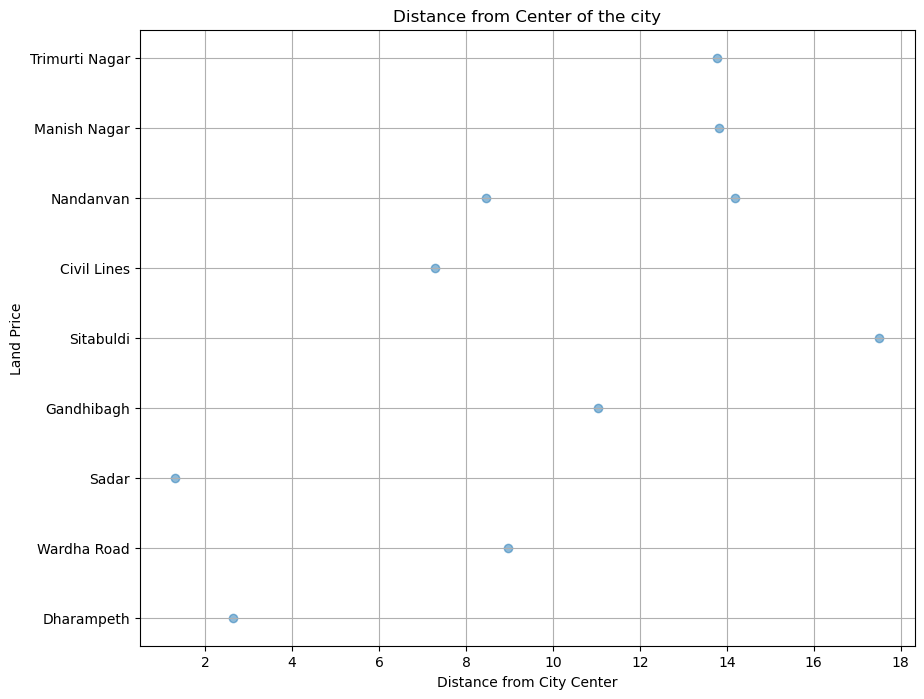

In [39]:
distance_from_center = df['Distance to City Center']
land_price = df['Location']

plt.figure(figsize=(10, 8))
plt.scatter(distance_from_center, land_price, alpha=0.5)
plt.title('Distance from Center of the city')
plt.xlabel('Distance from City Center')
plt.ylabel('Land Price')
plt.grid(True)
plt.show()